# Make Results Figures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
architecture = 'fcn'
branches = 6
shared_frac_list = [0, 0.25, 0.5, 0.75, 1]

## Ensemble

In [3]:
df = pd.read_csv('results/mnist-{}/B{}-test.csv'.format(architecture, branches))

In [4]:
df

,Unnamed: 0,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,after_mean_acc,before_mean_acc,model_id_1,model_id_2,model_id_3,model_id_4,model_id_5,model_id_6
0,0,0.9463,0.9429,0.9425,0.9427,0.9435,0.9474,0.9511,0.9511,8,2,6,4,5,1
1,0,0.9463,0.9435,0.9436,0.9429,0.9474,0.9427,0.9509,0.9511,8,5,3,2,1,4
2,0,0.9435,0.9436,0.9474,0.9463,0.9425,0.9429,0.9517,0.9515,5,3,1,8,6,2
3,0,0.9429,0.9425,0.9427,0.9463,0.9474,0.9435,0.9511,0.9511,2,6,4,8,1,5
4,0,0.9427,0.9425,0.9463,0.9375,0.9474,0.9436,0.9509,0.9502,4,6,8,7,1,3
5,0,0.9463,0.9435,0.9429,0.9436,0.9474,0.9425,0.9517,0.9515,8,5,2,3,1,6
6,0,0.9435,0.9427,0.9474,0.9436,0.9425,0.9463,0.9508,0.9512,5,4,1,3,6,8
7,0,0.9435,0.9463,0.9375,0.9474,0.9427,0.9436,0.9514,0.9509,5,8,7,1,4,3


In [5]:
avg_acc = df['before_mean_acc'].mean()
std_acc = df['before_mean_acc'].std()
print(avg_acc, std_acc)

0.951075 0.00040970372570570655


## Baseline

In [6]:
baseline_val_acc = []
for i in range(8):
    df = pd.read_csv('results/mnist-{}/train_{}.csv'.format(architecture, i+1))
    baseline_val_acc.append(df.iloc[-1]['val_acc'])
baseline = np.mean(baseline_val_acc)
print(baseline)

0.9433000013232231


In [7]:
print(baseline_val_acc)

[0.9473999738693236, 0.942900002002716, 0.9435999989509584, 0.9427000284194946, 0.9434999823570251, 0.9424999952316284, 0.9375, 0.9463000297546388]


## Virtual Branching

In [8]:
results = {}
results_std = {}
for frac in shared_frac_list:
    val_acc = []
    for i in range(4):
        df = pd.read_csv('results/vb-mnist-{}/B{}/S{:.2f}/train_{}.csv'.format(architecture, branches, frac, i+1))
        val_acc.append(df.iloc[-1]['val_acc_ensemble'])
    print(frac, val_acc)
    results[frac] = np.mean(val_acc)
    results_std[frac] = np.std(val_acc)

0 [0.9505000114440918, 0.9514999985694884, 0.9524000287055968, 0.9524000287055968]
0.25 [0.9488999843597412, 0.948300004005432, 0.9477000236511229, 0.9495999813079834]
0.5 [0.9485999941825868, 0.94760000705719, 0.9488999843597412, 0.9452000260353088]
0.75 [0.94650000333786, 0.9462000131607056, 0.9441999793052672, 0.9463000297546388]
1 [0.9409999847412108, 0.9452000260353088, 0.942900002002716, 0.9463000297546388]


In [9]:
results

{0: 0.9517000168561935,
 0.25: 0.94862499833107,
 0.5: 0.9475750029087067,
 0.75: 0.9458000063896179,
 1: 0.9438500106334686}

## Create Figure

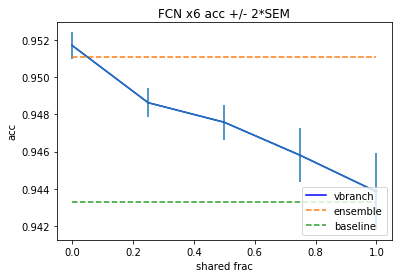

In [10]:
results_list = list(results.items())
results_list.sort()
results_list = np.array(results_list)

plt.plot(results_list[:, 0], results_list[:,1], label='vbranch', color='blue')
trials = 4
error = np.sort(np.array(list(results_std.items())), 0)[:, 1] / np.sqrt(trials)
plt.errorbar(results_list[:, 0], results_list[:,1], error*2)

plt.plot(results_list[:, 0], [avg_acc]*len(results_list), label='ensemble', linestyle='--')
plt.plot(results_list[:, 0], [baseline]*len(results_list), label='baseline', linestyle='--')

plt.legend(loc='lower right')
plt.xlabel('shared frac')
plt.ylabel('acc')
plt.title('{} x{} acc +/- 2*SEM'.format(architecture.upper(), branches))

if not os.path.isdir('figs'):
    os.system('mkdir figs')
    
plt.savefig('figs/{}-{}-results.png'.format(architecture, branches))
plt.show()

## Batch Size

In [11]:
# batch_size_list = [10, 20, 40, 80, 100, 160, 200]
# batch_size_acc = []

# for batch_size in batch_size_list:
#     arr = []
#     for i in range(8):
#         df = pd.read_csv('results/batch_size/mnist-fcn/batch_{}/train_{}.csv'.format(batch_size,i+1))
#         arr.append(df.iloc[-1]['val_acc'])
#     batch_size_acc.append([np.mean(arr), np.std(arr)])

In [12]:
# batch_size_acc = np.array(batch_size_acc)

# # plt.plot(batch_size_list, batch_size_acc[:, 0])
# trials = 8
# error = batch_size_acc[:, 1] / np.sqrt(trials)
# plt.errorbar(batch_size_list, batch_size_acc[:, 0], error*2)
# plt.title('fcn val acc vs. batch size')
# plt.xlabel('batch size')
# plt.ylabel('val acc')

# plt.savefig('figs/fcn-val-acc-batch-size.png')
# plt.show()